In [2]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Change working Directory
os.chdir('../Data Files')

In [4]:
# Load Dataset
ibm_df = pd.read_csv('ibm-common-stock-closing-prices.csv')
ibm_df.head()


,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


In [5]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


In [6]:
# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

In [15]:
ibm_df['SES_08'] = single_exp_smoothing(ibm_df['Close_Price'], 0.8)
ibm_df['SES_06'] = single_exp_smoothing(ibm_df['Close_Price'], 0.6)
ibm_df['SES_04'] = single_exp_smoothing(ibm_df['Close_Price'], 0.4)

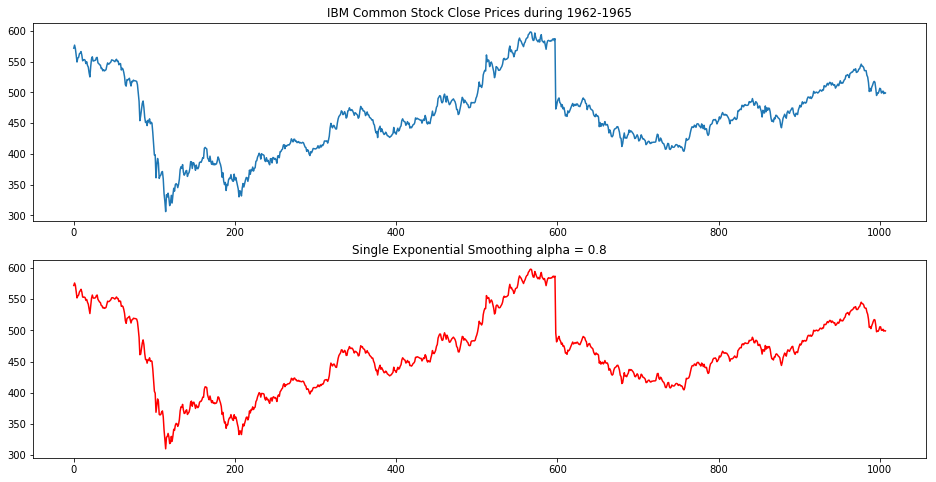

In [26]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax)
ax.set_title('IBM Common Stock Close Prices during 1962-1965')

ax = fig.add_subplot(2,1,2)
ibm_df['SES_08'].plot(ax=ax, color='r')
ax.set_title('Single Exponential Smoothing alpha = 0.8')

# ax = fig.add_subplot(4,1,3)
# ibm_df['SES_06'].plot(ax=ax, color='r')
# ax.set_title('Single Exponential Smoothing alpha = 0.6')

# ax = fig.add_subplot(4,1,4)
# ibm_df['SES_04'].plot(ax=ax, color='r')
# ax.set_title('Single Exponential Smoothing alpha = 0.4')

plt.savefig('../plots/ch3/B07887_02_14.png', format='png', dpi=300)


In [30]:
# Plot the forecasted values using multiple alpha values
#Calculate the moving averages using 'rolling' and 'mean' functions
ibm_df['SES2']  = single_exp_smoothing(ibm_df['Close_Price'], 0.2)
ibm_df['SES6']= single_exp_smoothing(ibm_df['Close_Price'], 0.6)
ibm_df['SES8']= single_exp_smoothing(ibm_df['Close_Price'], 0.8)


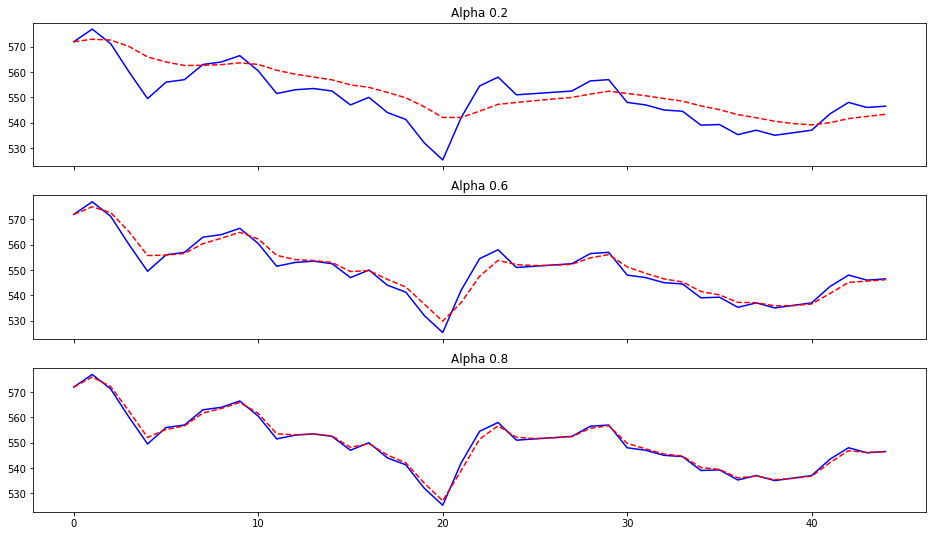

In [31]:
# Plot the curves
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(16, 9)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')
plt.savefig('../plots/ch3/B07887_02_15.png', format='png', dpi=300)

In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [33]:
# create class
model = SimpleExpSmoothing(ibm_df['Close_Price'])
# fit model
model_fit8 = model.fit(smoothing_level=0.8)

In [34]:
model_fit6 = model.fit(smoothing_level=0.6)

In [35]:
model_fit2 = model.fit(smoothing_level=0.2)

In [36]:
# make prediction
yhat8 = model_fit8.predict(1)
yhat6 = model_fit6.predict(1)
yhat2 = model_fit2.predict(1)

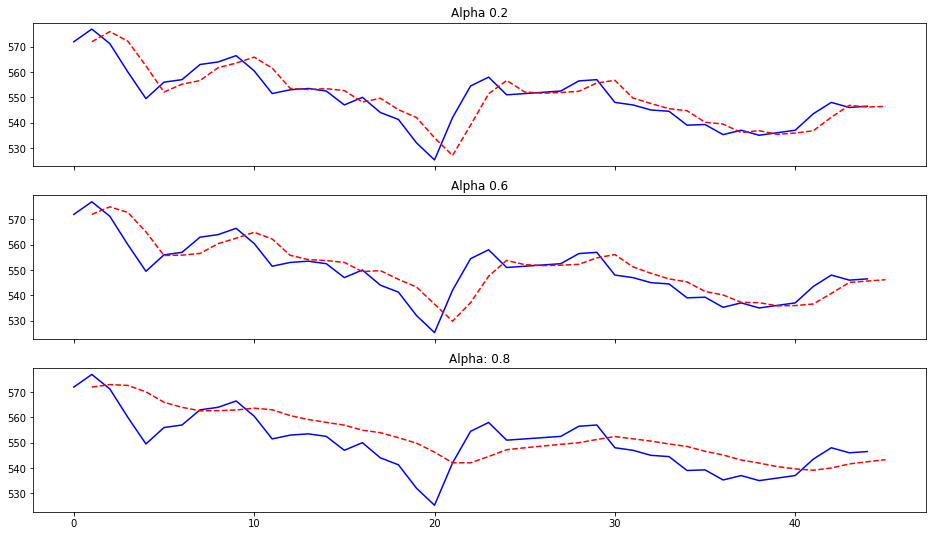

In [38]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(16, 9)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
yhat2.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[0].set_title('Alpha 0.2')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
yhat6 .iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
yhat8.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[2].set_title('Alpha: 0.8')
plt.savefig('../plots/ch3/B07887_03_15.png', format='png', dpi=300)

\begin{equation}
x_{t+1} = \alpha x_{t} + \alpha(1-\alpha)x_{t-1} + \alpha(1-\alpha)^2x_{t-2} + ...
\end{equation}